# Ans 1.1

Quadratic approximation for $f(x)$ :-
$$
\begin{aligned}
& f(x+\Delta x)=f(x)+\nabla f(x) \cdot \Delta x \\
&+\nabla^2 f(x) \frac{(\Delta x)^2}{2}
\end{aligned}
$$

Putting $\Delta x=-\operatorname{\epsilon g ,}$
$\epsilon=$ learning rate, $g=$ gradient of $f$, $H=$ Hessian matrix for $f$
$$


\Rightarrow f(x-\operatorname{\epsilon g})=f(x)+g(-\epsilon g)^{\top}+\frac{\epsilon^2}{2} g^{\top} H g
$$

Let this be a $f^n$ of $\epsilon$,
$$
\Rightarrow \phi(\epsilon)=f(x)-\operatorname{\epsilon g}^{\top} g+\frac{\epsilon^2}{2} g^{\top} / g
$$

To find optimal value of $\epsilon$,
$$
\begin{aligned}
& \text { Putting } \frac{\partial \phi(\epsilon)}{\partial \epsilon}=0 \\
& \Rightarrow-g^{\top} g+\epsilon g^{\top} H g=0 \\
& \Rightarrow \epsilon^*=\frac{g^{\top} g}{g^{\top} H g}
\end{aligned}
$$

$$
\text{Let } f(x) \text{ be any general function of } x. \text{ The local quadratic approximation (Taylor's Expansion) is:}
$$
$$
f(x+\Delta x) \approx f(x) + (\nabla f(x))^{\top} \Delta x + \frac{1}{2}(\Delta x)^{\top} H(x) \Delta x
$$

$$
\text{Now, to analyze stability, we consider the behavior near a local minimum where } \nabla f(x) = 0. \text{ Therefore, we have: }
$$
$$
x  := x + \Delta x - \alpha H(x) \Delta x
$$


$$
\text{To ensure stability, the eigenvalues of \(I - \alpha H(x)\) must lie within the interval \([-1, 1]\). This gives us the condition:}
$$
$$
-1 < 1 - \alpha \lambda_i < 1
$$
$$
\text{We can split this inequality into two parts:}
$$
$$
1. \text{From \(1 - \alpha \lambda_i < 1\):}
$$
$$
1 - \alpha \lambda_i < 1 \Rightarrow -\alpha \lambda_i < 0 \Rightarrow \alpha \lambda_i > 0 \quad \text{(always true since } \alpha > 0 \text{ and } \lambda_i > 0 \text{)}
$$
$$
2. \text{From \(-1 < 1 - \alpha \lambda_i\):}$$

$$
-1 < 1 - \alpha \lambda_i \Rightarrow -1 < - \alpha \lambda_i \Rightarrow \alpha \lambda_i < 2 \Rightarrow \alpha < \frac{2}{\lambda_i}
$$
$$
\text{Therefore, to ensure stability, the learning rate \(\alpha\) must satisfy:}
$$
$$
0 < \alpha < \frac{2}{\lambda_{\max}}
$$
$$
\text{where \(\lambda_{\max}\) is the largest eigenvalue of the Hessian matrix \(H(x)\).}
$$

# Ans 1.2

$$
f(x)=\frac{1}{2} x^{\top} a x+b x+c
$$

Update Rule:
$$
x:=x-\alpha \nabla f(x)
$$
$$
\begin{aligned}
& \nabla f(x)=a x+b \\
& \Rightarrow x:=x-\alpha(a x+b) \\
& \Rightarrow x:=x(1-\alpha a)-\alpha b
\end{aligned}
$$
[ $b$ is a constant vector and doesn't affect the stability analysis]
$$
\Rightarrow x:=x(1-\alpha a)
$$

#### The derivation afterwards is similar to that done in 1.1 (replace H(x) with a). 

#### Hence we get the same final result, i.e.

$$
0 < \alpha < \frac{2}{\lambda_{\max}}
$$
$$
\text{where \(\lambda_{\max}\) is the largest eigenvalue of  the matrix a}
$$

# Ans 1.3

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [7]:
x1,x2 = sp.symbols('x1 x2')
f = 9*x1**2 + 4*x2**2 + 36*x1*x2 + 9*x1 + 4*x2 +10

grad_f=sp.Matrix([sp.diff(f,x) for x in (x1,x2)])
hess_f = sp.hessian(f,(x1,x2))

grad_func=sp.lambdify((x1,x2),grad_f)
hess_func=sp.lambdify((x1,x2),hess_f)

def grad_desc_opt(initial_pt,num_iter):
    x = initial_pt
    points=[]
    alph=[]
    for i in range(num_iter):
        g=np.array(grad_func(x[0],x[1])).flatten()
        H=hess_func(x[0],x[1])
        alpha_opt=np.dot(g,g)/np.dot(g,np.dot(H,g))
        x=x-alpha_opt*g
        points.append(x)
        alph.append(alpha_opt)

    return np.array(points)

        


initial_pt=[0,0]

num_iter=50





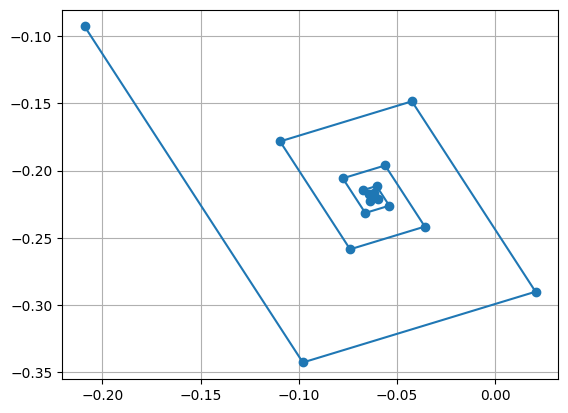

In [8]:
grad_desc_opt(initial_pt,num_iter)

x1_val = []
x2_val = []

for i in range(num_iter):
    x1_val.append(grad_desc_opt(initial_pt,num_iter)[i][0])
    x2_val.append(grad_desc_opt(initial_pt,num_iter)[i][1])

plt.plot(x1_val,x2_val,marker='o')
plt.grid(True)

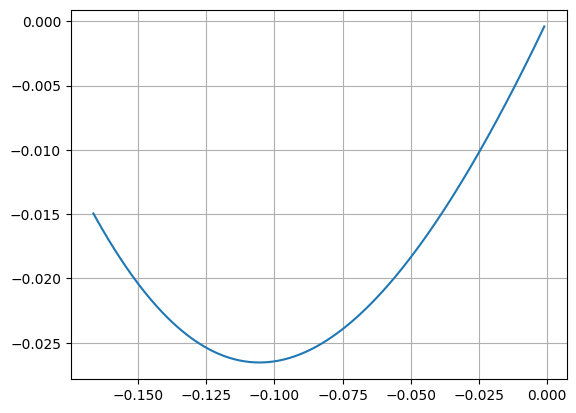

In [9]:
def grad_desc_low(initial_pt,num_iter):
    x = initial_pt
    points=[]
    for i in range(num_iter):
        g=np.array(grad_func(x[0],x[1])).flatten()
       
        alpha_opt=0.0001
        x=x-alpha_opt*g
        points.append(x)

    return np.array(points)

initial_pt=[0,0]

num_iter=250

grad_desc_low(initial_pt,num_iter)

x1_val = []
x2_val = []

for i in range(num_iter):
    x1_val.append(grad_desc_low(initial_pt,num_iter)[i][0])
    x2_val.append(grad_desc_low(initial_pt,num_iter)[i][1])

plt.plot(x1_val,x2_val)
plt.grid(True)
    


 When we write $f\left(x_1, x_2\right)$ in the form
$$
\frac{1}{2} x^{\top} a x+b x+c \text {, we get } a=\left(\begin{array}{cc}
18 & 36 \\
36 & 8
\end{array}\right)
$$

Calculating the eigen values of $a$,
$$
\begin{aligned}
& |a-\lambda I|=0 \Rightarrow(18-\lambda)(8-\lambda)-(36)^2=0 \\
& \Rightarrow \lambda^2-26 \lambda+144=1296 \\
& \Rightarrow \lambda=49.346,-23.346 \\
& \Rightarrow \lambda_{\max }=49.346
\end{aligned}
$$

$$
\text{Range for the stability of the learning rate:-}
$$


$$
0 < \alpha < \frac{2}{\lambda_{\max}}
$$



In [10]:
def grad_desc_boundary(initial_pt,num_iter):
    x = initial_pt
    points=[]
    for i in range(num_iter):
        g=np.array(grad_func(x[0],x[1])).flatten()
       
        alpha_opt=2/49.346
        x=x-alpha_opt*g
        points.append(x)

    return np.array(points)

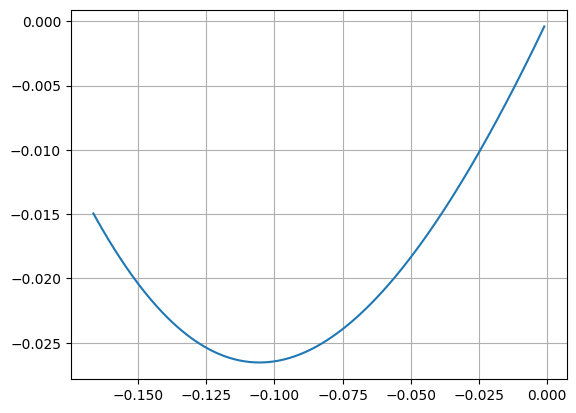

In [11]:
initial_pt=[0,0]

num_iter=250

grad_desc_low(initial_pt,num_iter)

x1_val = []
x2_val = []

for i in range(num_iter):
    x1_val.append(grad_desc_low(initial_pt,num_iter)[i][0])
    x2_val.append(grad_desc_low(initial_pt,num_iter)[i][1])

plt.plot(x1_val,x2_val)
plt.grid(True)

# Ans 2

maximise:
$$
50 x_1+60 x_2
$$
subject to:
$$
\begin{aligned}
& 2 x_1+x_2-300 \leq 0 \\
& 3 x_1+4 x_2-509 \leq 0 \\
& 4 x_1+7 x_2-812 \leq 0 \\
& x_1, x_2 \geq 0
\end{aligned}
$$

Now,
$$
\begin{aligned}
& L(x, \mu)= 50 x_1+60 x_2+\mu_1\left(-2 x_1-x_2+300\right) \\
&+\mu_2\left(-3 x_1-4 x_2+509\right) \\
&+\mu_3\left(-4 x_1-7 x_2+812\right)
\end{aligned}
$$

S5f56555690.0.H
$$
\begin{aligned}
g(\mu)= & \min _x L(x, \mu) \\
= & x_1\left(50-2 \mu_1-3 \mu_2-4 \mu_3\right)+x_2\left(60-\mu_1-4 \mu_2-\pi \mu_3\right) \\
& +300 \mu_1+50 \mu_2+812 \mu_3
\end{aligned}
$$

To find the infimum, set co-effecients of $x_1 \& x_2$ equal to 0 .
$$
\Rightarrow 2 \mu_1+3 \mu_2+4 \mu_3=50,  \mu_1+4 \mu_2+7 \mu_3=60
$$

Substituting back into $g(\mu)$,
$$
g(\mu)=300 \mu_1+509 \mu_2+812 \mu_3
$$
$$
\text{Hence, the Dual Problem:-}
$$
$$
\begin{gathered}
\text { max, } 300 \mu_1+509 \mu_2+812 \mu_3 \\
\text { st, } 2 \mu_1+3 \mu_2+4 \mu_3=50 \\
\mu_1+4 \mu_2+7 \mu_3=60 \\
\mu_1, \mu_2, \mu_3 \geqslant 0
\end{gathered}
$$

In [117]:
from scipy.optimize import linprog

result = linprog([300, 509, 812],A_eq = [[2, 3, 4],[1, 4, 7]], b_eq = [50, 60],bounds = [(0, None), (0, None), (0, None)])

print('solution : ',result.x)
print('value at optimum pt. : ',result.fun)


solution :  [ 4. 14.  0.]
value at optimum pt. :  8326.0
